# Import

In [4]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import StackingRegressor
from tensorflow import keras
from keras import layers

# Tiền xử lí

1. Đọc dữ liệu

In [47]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


2. Bỏ cột Date do dữ liệu ko cần thiết

In [6]:
df.drop(columns=['date'], inplace=True)

3. Chuyển đổi giá trị từ chuỗi sang số

In [7]:
mapping = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}

df['weather'] = df['weather'].map(mapping)
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


4. Chia dữ liệu thành train and test

In [8]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Chuẩn hoá dữ liệu

In [9]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [11]:
# Build the neural network model
model_Neural_Net = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model_Neural_Net.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_Neural_Net.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5434 - loss: 1.4551 - val_accuracy: 0.7009 - val_loss: 1.0225
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7181 - loss: 0.9547 - val_accuracy: 0.7436 - val_loss: 0.8287
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7462 - loss: 0.8576 - val_accuracy: 0.7479 - val_loss: 0.7632
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7501 - loss: 0.7604 - val_accuracy: 0.7692 - val_loss: 0.7041
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7493 - loss: 0.7439 - val_accuracy: 0.7778 - val_loss: 0.6769
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7849 - loss: 0.6605 - val_accuracy: 0.7735 - val_loss: 0.6553
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7754 - loss: 0.6720 - val_accuracy: 0.7735 - val_loss: 0.6381
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7811 - loss: 0.6539 - val_accuracy: 0.7735 - val_loss:

In [18]:
# Đánh giá Neural Network
test_loss, test_accuracy = model_Neural_Net.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8154 - loss: 0.5361
Test Loss: 0.5285153388977051
Test Accuracy: 0.8191125988960266


Bagging

In [35]:
# Bagging
bagging_lr = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
y_pred_bagging_lr = bagging_lr.predict(X_test)

Stacking

In [36]:
# Tạo các mô hình cho stacking
estimators = [
    ('lr', LinearRegression()),
    ('lasso', Lasso())
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Kiểm tra model

In [39]:
# Đánh giá Neural Network
test_loss, test_accuracy = model_Neural_Net.evaluate(X_test, y_test)
print(f'NN Loss: {test_loss}')
print(f'NN Accuracy: {test_accuracy}')

# Đánh giá Bagging Linear Regression
print("Bagging MSE:", mean_squared_error(y_test, y_pred_bagging_lr))
print("Bagging R²:", r2_score(y_test, y_pred_bagging_lr))

# Đánh giá mô hình Stacking
print("Stacking Model MSE:", mean_squared_error(y_test, y_pred_stacking))
print("Stacking Model R²:", r2_score(y_test, y_pred_stacking))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8154 - loss: 0.5361
NN Loss: 0.5285153388977051
NN Accuracy: 0.8191125988960266
Bagging MSE: 1.0702309521578144
Bagging R²: 0.24825513817872513
Stacking Model MSE: 1.0738178882941931
Stacking Model R²: 0.24573562516635428


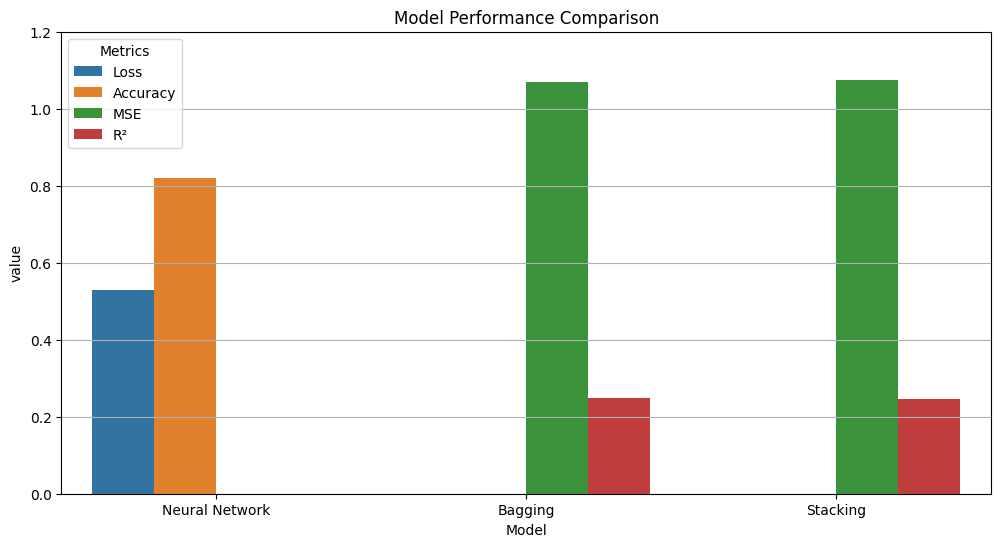

In [43]:
# Metrics
models = ['Neural Network', 'Bagging', 'Stacking']
loss = [0.5285, None, None]  # Only NN has loss
accuracy = [0.8191, None, None]  # Only NN has accuracy
mse = [None, 1.0702, 1.0738]  # MSE for Bagging and Stacking
r2 = [None, 0.2483, 0.2457]  # R² for Bagging and Stacking

metrics = pd.DataFrame({
    'Model': models,
    'Loss': loss,
    'Accuracy': accuracy,
    'MSE': mse,
    'R²': r2
})

# Melt the DataFrame to long format for easier plotting
metrics_melted = metrics.melt(id_vars='Model', value_vars=['Loss', 'Accuracy', 'MSE', 'R²'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='value', hue='variable', data=metrics_melted)

# Customize the plot
plt.title('Model Performance Comparison')
plt.ylabel('Performance Metric')
plt.xlabel('Model')
plt.ylim(0, 1.2)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()